# CS 282
### Programming Assignment 1
#### Item 5

Jan Lendl R. Uy

2019-00312

#### Sytem Specifications
- macOS Sequoia 15.0.1
- Macbook Air M1 (ARM), 8-Core CPU and 8-Core GPU

In [82]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [83]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [84]:
images_directory = "images"

In [85]:
def read_image(image_path):
    """
    Read image file regardless of format (including GIF)
    Returns grayscale numpy array
    """
    # Get file extension
    _, ext = os.path.splitext(image_path)
    ext = ext.lower()

    if ext in ['.gif', '.tif', '.tiff']:
        # Use PIL for GIF and TIFF files
        try:
            pil_img = Image.open(image_path)
            # Convert to grayscale
            if pil_img.mode != 'L':
                pil_img = pil_img.convert('L')
            # Convert to numpy array
            return np.array(pil_img)
        except Exception as e:
            print(f"Error reading image with PIL: {e}")
            return None
    else:
        # Use OpenCV for other formats
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        return img

In [86]:
def save_image(image_array, output_path):
    """
    Save a numpy array as an image file
    """
    try:
        # Get file extension to determine format
        _, ext = os.path.splitext(output_path)
        ext = ext.lower()
        
        if ext in ['.gif', '.tif', '.tiff']:
            # Use PIL for GIF and TIFF files
            pil_img = Image.fromarray(image_array)
            pil_img.save(output_path)
        else:
            # Use OpenCV for other formats (jpg, png, etc.)
            cv2.imwrite(output_path, image_array)
        
        print(f"Image successfully saved to {output_path}")
        return True
    
    except Exception as e:
        print(f"Error saving image: {e}")
        return False

In [87]:
def display_results(original, enhanced, title="Image Enhancement Results"):
    """
    Display original and enhanced images with histograms
    """
    fig = plt.figure(figsize=(15, 8))
    
    # Original image
    plt.subplot(231)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Original histogram
    plt.subplot(234)
    plt.hist(original.ravel(), 256, color='blue', alpha=0.7)
    plt.title('Original Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Count')
    
    # Enhanced image
    plt.subplot(232)
    plt.imshow(enhanced, cmap='gray')
    plt.title('Enhanced Image')
    plt.axis('off')
    
    # Enhanced histogram
    plt.subplot(235)
    plt.hist(enhanced.ravel(), 256, color='red', alpha=0.7)
    plt.title('Enhanced Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Count')
    
    # Difference image
    plt.subplot(233)
    diff = cv2.absdiff(enhanced, original)
    plt.imshow(diff, cmap='gray')
    plt.title('Difference Image')
    plt.axis('off')
    
    # Image statistics
    stats_text = f"Original - Mean: {np.mean(original):.1f}, Std: {np.std(original):.1f}\n"
    stats_text += f"Enhanced - Mean: {np.mean(enhanced):.1f}, Std: {np.std(enhanced):.1f}"
    plt.subplot(236)
    plt.text(0.1, 0.5, stats_text, wrap=True)
    plt.axis('off')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

## Dental Image


Processing images/dental.gif...


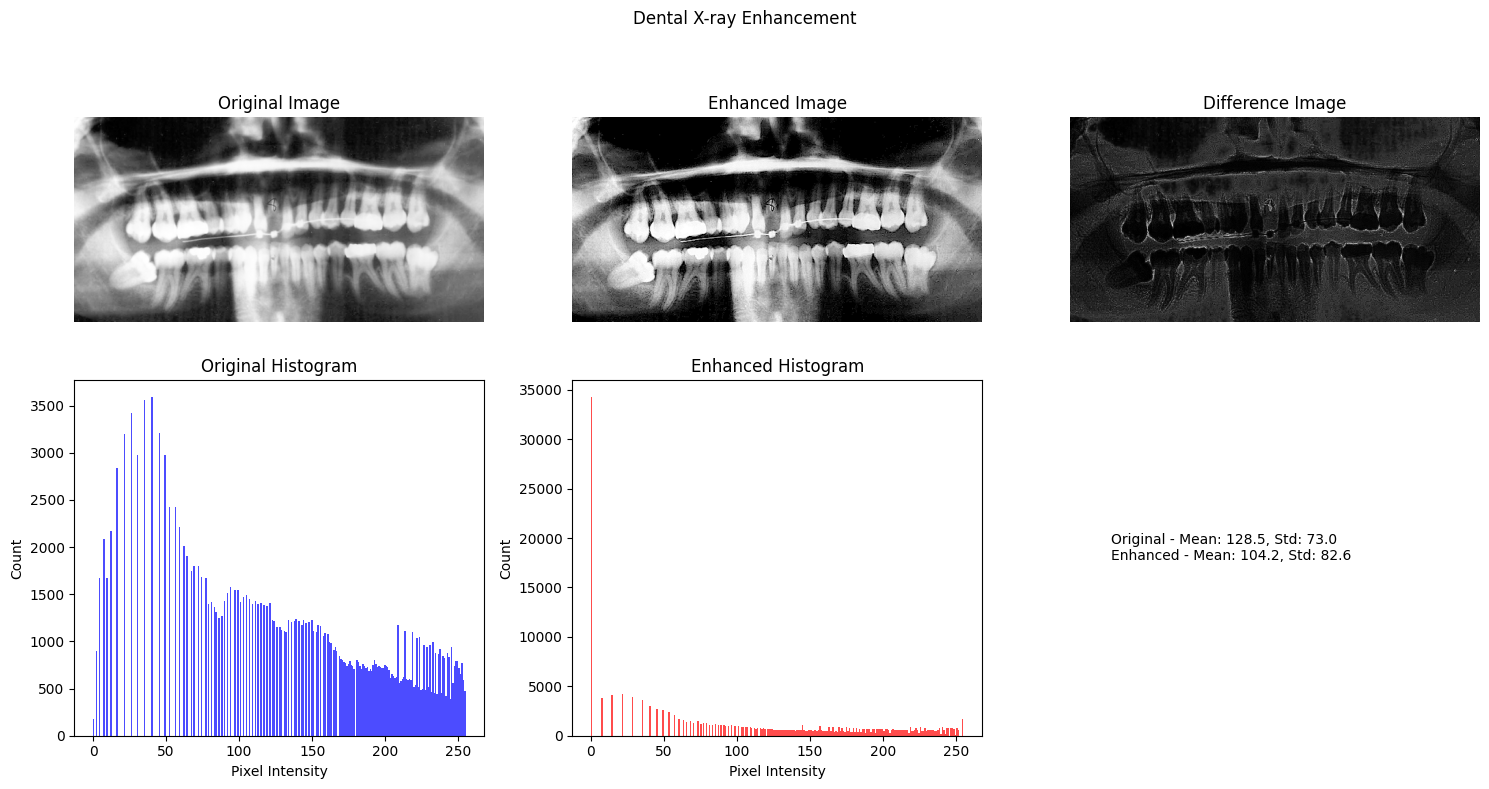

Image successfully saved to images/dental_enhanced.gif


True

In [88]:
# Dental X-ray enhancement
dental_img_dir = f"{images_directory}/dental.gif"

print(f"\nProcessing {dental_img_dir}...")
dental_img = read_image(dental_img_dir)

# Apply power-law transformation (gamma correction)
# Image is bright. Apply gamma > 1 to compress gray levels
gamma = 3
dental_enhanced = np.array(255 * (dental_img / 255) ** gamma, dtype=np.uint8)

# Apply Laplacian sharpening
kernel = np.array([[0, -1, 0], 
                   [-1, 5, -1], 
                   [0, -1, 0]], dtype=np.float32)
dental_enhanced = cv2.filter2D(dental_enhanced, -1, kernel)

# Histogram equalization to improve contrast
dental_enhanced = cv2.equalizeHist(dental_enhanced)

display_results(dental_img, dental_enhanced, "Dental X-ray Enhancement")

# Save the enhanced image
save_image(dental_enhanced, f"{images_directory}/dental_enhanced.gif")

### Rationale

To enhance the bright dental x-ray, the following image enhancement steps were applied: (i) power-law transformation with gamma = 3 to darken and reveal obscured tooth details; (ii) Laplacian sharpening to enhance edges of dental structures; and (iii) histogram equalization to optimize contrast. These steps significantly improved visibility of dental features like tooth boundaries and the placement of braces on the teeth.

## Cells Image

Processing images/cells27.jpg...


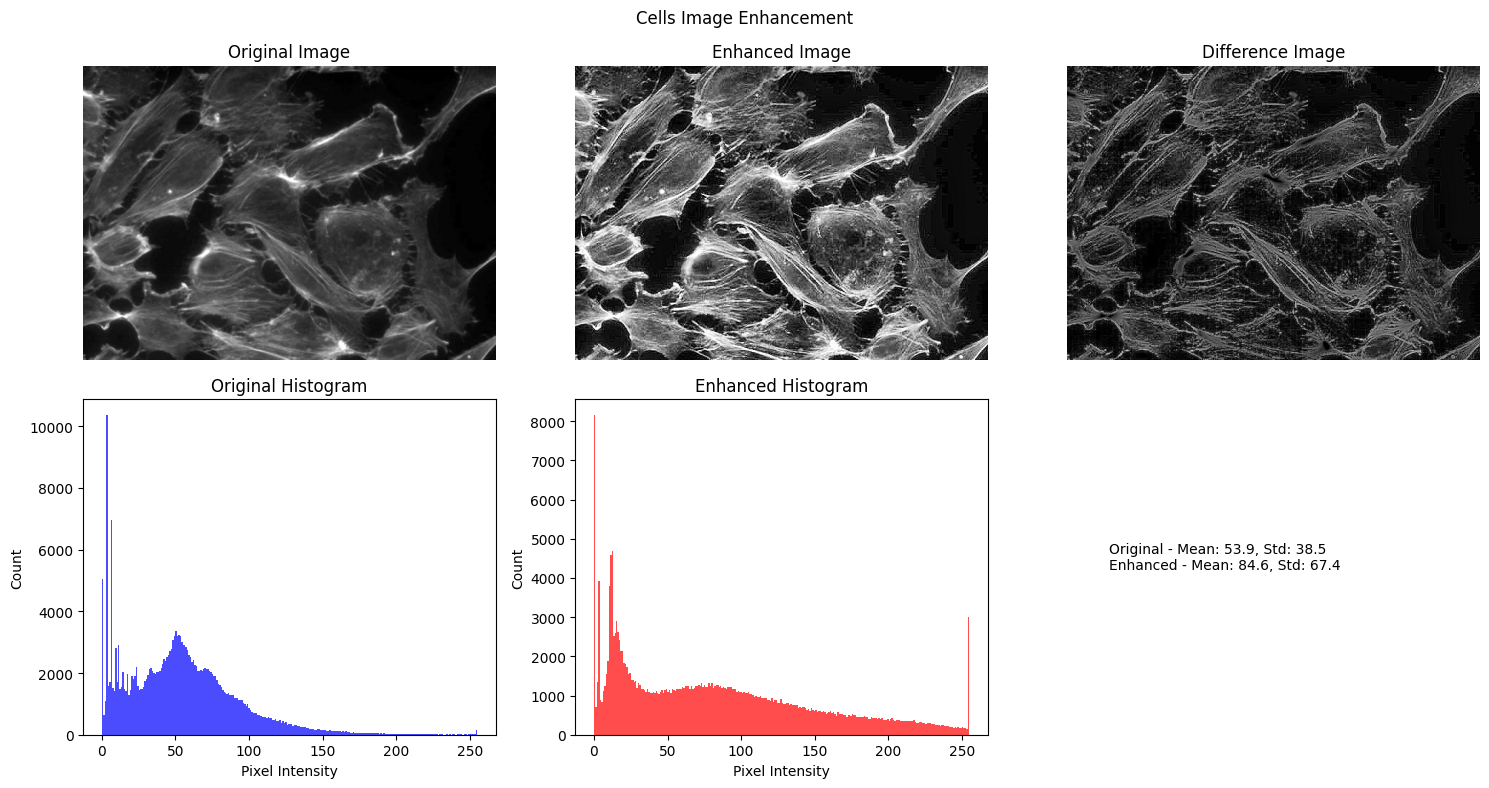

Image successfully saved to images/cells27_enhanced.jpg


True

In [89]:
# Cell image enhancement
cells_img_dir = f"{images_directory}/cells27.jpg"

print(f"Processing {cells_img_dir}...")
cells_img = read_image(cells_img_dir)

# Apply CLAHE for better cell visibility
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cells_enhanced = clahe.apply(cells_img)

# Apply Laplacian sharpening
kernel = np.array([[0, 1, 0],
                [1, -4, 1],
                [0, 1, 0]], dtype=np.float32)
cells_laplacian = cv2.filter2D(cells_enhanced, cv2.CV_64F, kernel)
cells_enhanced = np.uint8(np.clip(cells_enhanced - cells_laplacian, 0, 255))

display_results(cells_img, cells_enhanced, "Cells Image Enhancement")

# Save the enhanced image
save_image(cells_enhanced, f"{images_directory}/cells27_enhanced.jpg")

### Rationale

The cell image suffered from poor contrast that obscured cellular structures. Histogram equalization with a clip limit of 2.0 was performed to enhance contrast by pushing low pixel values to the right in the histogram. This step is then followed by Laplacian sharpening to emphasize cell boundaries and internal structures. The enhanced image reveals cellular details and membranes that were barely visible in the original image, making it more suitable for analysis.

## Butterfly Image


Processing images/butterfly.gif...


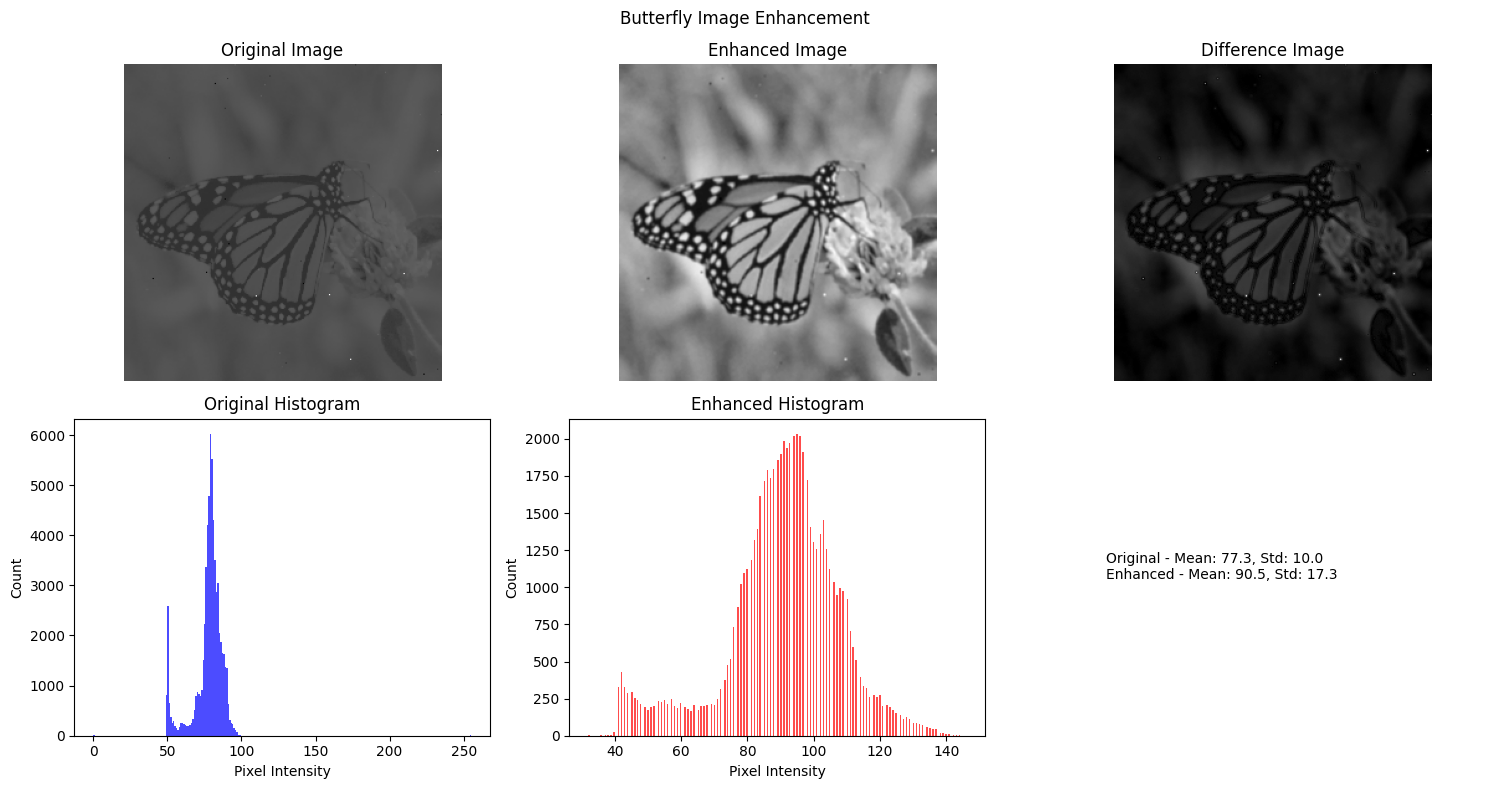

Image successfully saved to images/butterfly_enhanced.gif


True

In [96]:
# Butterfly image enhancement
butterfly_img_dir = f"{images_directory}/butterfly.gif"

print(f"\nProcessing {butterfly_img_dir}...")
butterfly_img = read_image(butterfly_img_dir)

butterfly_enhanced = cv2.equalizeHist(butterfly_img)

# Apply CLAHE to improve image contrast as original
# image is generally dark
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))
butterfly_enhanced = clahe.apply(butterfly_img)

# Apply light Gaussian blur to reduce any noise enhanced by equalization
butterfly_enhanced = cv2.GaussianBlur(butterfly_enhanced, (3,3), 0)

display_results(butterfly_img, butterfly_enhanced, "Butterfly Image Enhancement")

# Save the enhanced image
save_image(butterfly_enhanced, f"{images_directory}/butterfly_enhanced.gif")

### Rationale

For the butterfly image, histogram equalization with a clip limit of 1.0 was done to enhance wing pattern details while maintaining natural appearance. A light Gaussian blur was then applied to reduce noise artifacts introduced by the contrast enhancement. The resulting image shows significantly improved visibility of wing patterns and body details with balanced contrast.

## Mom and Kids Image


Processing images/momandkids.jpg...


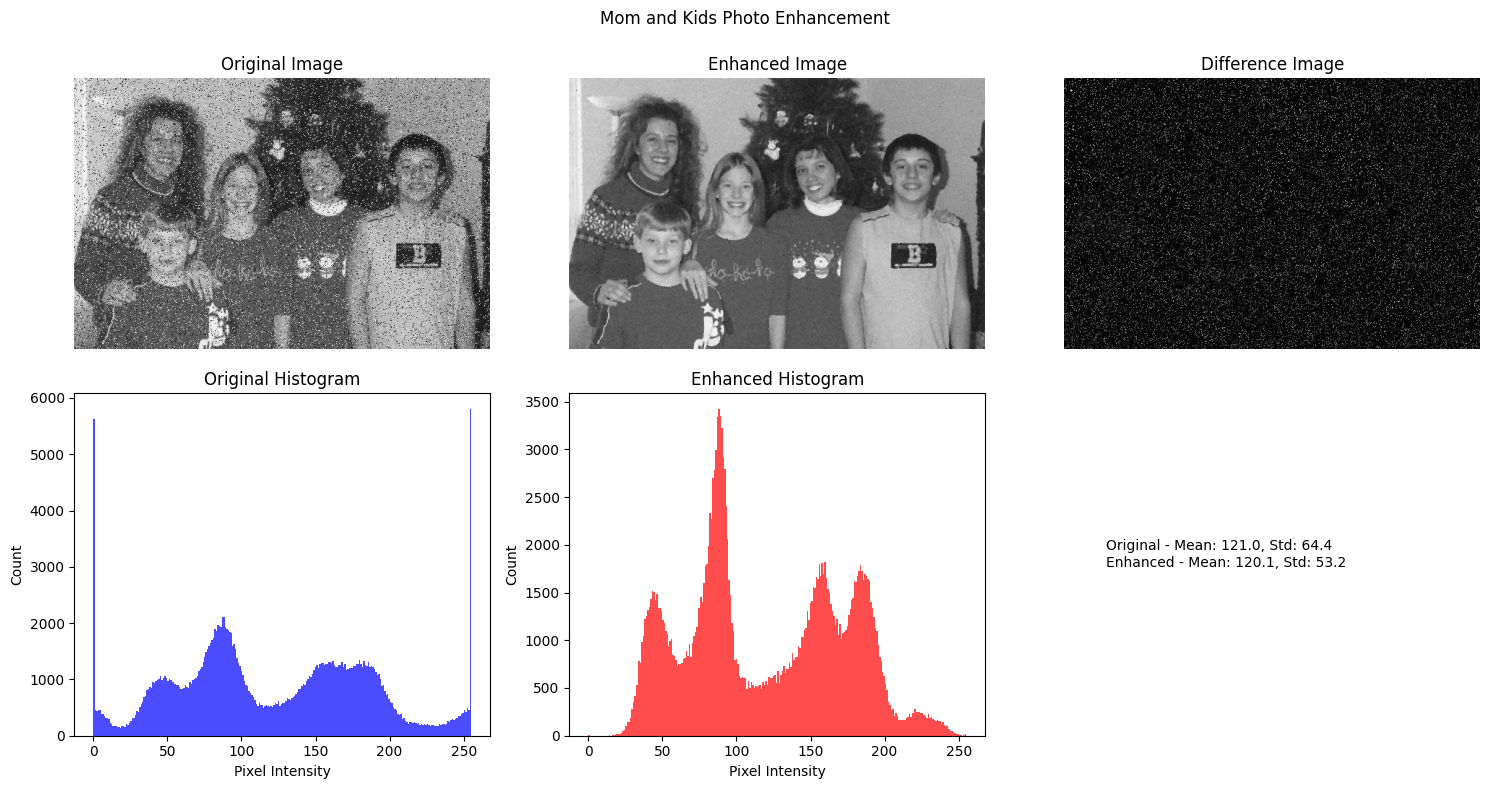

Image successfully saved to images/momandkids_enhanced.jpg


True

In [91]:
# Mom and kids photo enhancement
momandkids_img_dir = f"{images_directory}/momandkids.jpg"

print(f"\nProcessing {momandkids_img_dir}...")
momkids_img = read_image(momandkids_img_dir)

# Apply median filter with 3x3 mask to reduce salt-and-pepper noise
momkids_enhanced = cv2.medianBlur(momkids_img, 3)

# Apply high-boost filtering
# A > 1 boosts the original image while maintaining sharpening
blur = cv2.GaussianBlur(momkids_enhanced, (3,3), 2)
momkids_enhanced = cv2.addWeighted(momkids_enhanced, 1.7, blur, -0.7, 0)

display_results(momkids_img, momkids_enhanced, "Mom and Kids Photo Enhancement")

# Save the enhanced image
save_image(momkids_enhanced, f"{images_directory}/momandkids_enhanced.jpg")

### Rationale

The mom and kids image exhibited a generally noisy image with box-like outlines. To enhance this image, a 3×3 median filter was applied to eliminate the salt-and-pepper noise while preserving edges. High-boost filtering with a factor of 1.7 was then applied to enhance details that were lost with the blurring that occurred in the previous step. The result shows significantly reduced salt-and-pepper noise and better overall image sharpness.